In [1]:
# !pip install opencv-python==4.6.0.66 scikit-image==0.19.3

In [2]:
from matplotlib import pyplot as plt
from pathlib import Path

import numpy as np

import cv2
from skimage import io

def imshow(np_img, size=(10, 10), is_gray=False):
    plt.figure(figsize=size)
    if is_gray:
        plt.imshow(np_img, cmap='gray', vmin=0, vmax=255)
    else:
        plt.imshow(np_img)
    plt.show()

In [3]:
data_dir = Path('assets')
assert data_dir.exists()

In [4]:
img = cv2.cvtColor(io.imread(data_dir / 'text3.jpg'), cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
width = int(img.shape[1] * 2)
height = int(img.shape[0] * 2)
dim = (width, height)
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

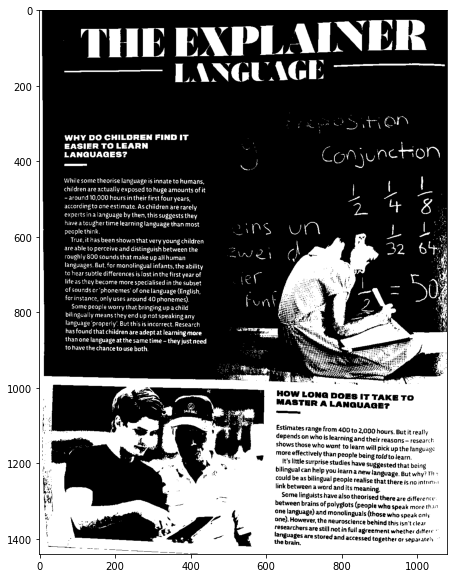

In [6]:
ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
# threshold = cv2.adaptiveThreshold(img_gray, 255,
#                           cv2.BORDER_REPLICATE,
#                           cv2.THRESH_BINARY_INV, 5, 5)

# ret, thresh = cv2.threshold(threshold, 0, 255, cv2.THRESH_BINARY)
# flipped_color = cv2.bitwise_not(thresh)
imshow(thresh, (10,10), True)

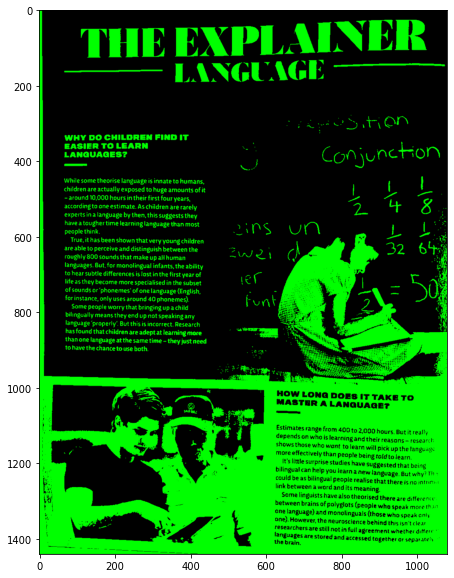

In [8]:
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
image_copy = img.copy()
# cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
image_copy = np.zeros_like(image_copy)#.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0,255,0), thickness=cv2.FILLED, lineType=cv2.LINE_AA)
imshow(image_copy)